In [1]:
from utils import load_dtrajs_from_npz

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# updated clustering
raw_dtrajs_abl = load_dtrajs_from_npz('abl_11400_2000_t_dtrajs.npz')
raw_dtrajs_src = load_dtrajs_from_npz('src_11401_2000_t_dtrajs.npz')

In [4]:
import pyemma

In [99]:
lags=[1,2,5,10,25,50,100,250,500,1000]

In [100]:
its = pyemma.msm.its(raw_dtrajs_abl,nits=10,lags=lags)

estimating MaximumLikelihoodMSM: 100% (10/10) [####################] eta 00:14 \29-02-16 10:36:42 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[1] WARNING  Estimation has failed at lagtimes: [ 50 100 250 500]. Run single-lag estimation at these lags to track down the error.


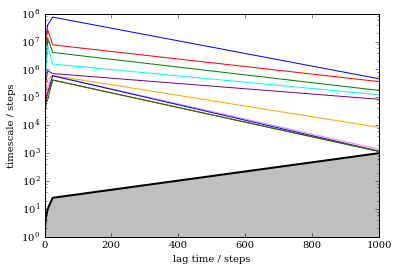

In [101]:
pyemma.plots.plot_implied_timescales(its)

In [118]:
import simtk.unit as u
(10*250*u.picosecond).value_in_unit(u.nanosecond)

2.4999999999999996

In [114]:
pyemma.msm.estimate_markov_model(raw_dtrajs_abl,lag=50)

Exception: Stationary distribution contains entries smaller than 1e-15 during iteration

In [6]:
def trim_dtrajs(dtrajs,length_to_discard=10,min_length=100):
   ''' Ignore trajectories under a specified length, and discard
   the initial frames of the remainder.

   Parameters
   ----------
   dtrajs : list of arrays

   length_to_discard : int, optional
   min_length : int, optional

   Returns
   -------
   trimmed : list of arrays
   '''
   trimmed = [traj[length_to_discard:] for traj in dtrajs if len(traj)>length_to_discard]
   return trimmed

In [7]:
dtrajs_abl = trim_dtrajs(raw_dtrajs_abl)
dtrajs_src = trim_dtrajs(raw_dtrajs_src)

In [8]:
import numpy as np
import mdtraj as md
from pyemma import msm
import pyemma.plots as mplt
import matplotlib.pyplot as plt
import numpy.random as npr
plt.rc('font',family='serif')
%matplotlib inline

In [102]:
import msmbuilder
import msmbuilder.msm
lag_frames = 10
ergodic_cutoff_in_frames=20
ergodic_cutoff = 1.0*ergodic_cutoff_in_frames/lag_frames

In [103]:
mb_msm_abl = msmbuilder.msm.MarkovStateModel(lag_time=lag_frames,
                                             reversible_type='transpose',
                                             #ergodic_cutoff=True,
                                             ergodic_cutoff='off')
mb_msm_abl.fit(dtrajs_abl)
print(mb_msm_abl.summarize())

Markov state model
------------------
Lag time         : 10
Reversible type  : transpose
Ergodic cutoff   : off
Prior counts     : 0

Number of states : 2000
Number of nonzero entries in counts matrix : 7731 (0.193275%)
Nonzero counts matrix entries:
    Min.   : 0.1
    1st Qu.: 0.3
    Median : 1.1
    Mean   : 10.4
    3rd Qu.: 9.4
    Max.   : 348.9

Total transition counts :
    80217.7 counts
Total transition counts / lag_time:
    8021.77 units
Timescales:
    [-883058750464808.12, -3002399751580335.50, -3216856876693216.50, -22517998136852484.00, -22517998136852484.00, -inf, -inf, 45035996273704960.00, 15011998757901648.00, 15011998757901648.00, 9007199254740987.00, 3335999723978140.50, 3002399751580325.50, 2434378176957019.50, 2094697501102551.50, 783234717803559.50, 941015.32, 629259.00, 204487.54, 182730.73, 117908.79, 98718.28, 64152.70, 52492.54, 47336.86, 42017.12, 40259.65, 33897.87, 32653.83, 31850.29, 31714.41, 30297.00, 28770.86, 28328.22, 24725.01, 24617.59, 24348.23

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/msmbuilder/msm/core.py:310: RuntimeWarning: invalid value encountered in sqrt
  lv[:, i] = lv[:, i] / np.sqrt(np.dot(lv[:, i], lv[:, i] / lv[:, 0]))


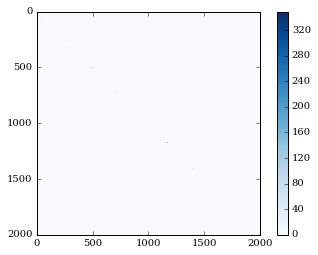

In [104]:
plt.imshow(mb_msm_abl.countsmat_,cmap='Blues',interpolation='none');
plt.colorbar()

In [105]:
np.trace(mb_msm_abl.transmat_)/len(mb_msm_abl.transmat_)

0.90235079594666556

In [106]:
np.trace(mb_msm_abl.countsmat_)/np.sum(mb_msm_abl.countsmat_)

0.91935944311542195

In [107]:
np.trace(mb_msm_abl.transmat_)

1804.7015918933312

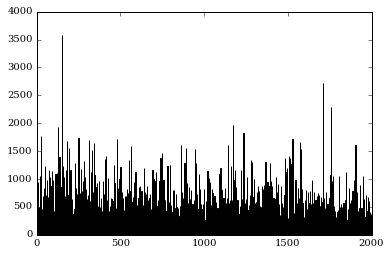

In [108]:
plt.hist(np.hstack(raw_dtrajs_abl),bins=len(set(np.hstack(raw_dtrajs_abl))));

In [109]:
mb_msm_abl = msmbuilder.msm.MarkovStateModel(lag_time=lag_frames,
                                             #ergodic_cutoff=True,
                                             ergodic_cutoff=ergodic_cutoff)
mb_msm_abl.fit(dtrajs_abl)
print(mb_msm_abl.summarize())

MSM contains 1727 strongly connected components above weight=2.00. Component 115 selected, with population 2.055656%
Markov state model
------------------
Lag time         : 10
Reversible type  : mle
Ergodic cutoff   : 2.0
Prior counts     : 0

Number of states : 16
Number of nonzero entries in counts matrix : 88 (34.375%)
Nonzero counts matrix entries:
    Min.   : 0.1
    1st Qu.: 0.7
    Median : 2.7
    Mean   : 18.2
    3rd Qu.: 6.0
    Max.   : 159.5

Total transition counts :
    1604.2 counts
Total transition counts / lag_time:
    160.42 units
Timescales:
    [1701.11, 285.72, 267.86, 194.55, 140.68, 139.06, 99.43, 90.69, 87.39, 84.66, 66.12, 58.88, 48.60, 42.05, 28.92]  units



In [110]:
mb_msm_abl.countsmat_.sum()

1604.1999999999998

In [111]:
mb_msm_src = msmbuilder.msm.MarkovStateModel(lag_time=lag_frames,
                                             reversible_type='transpose',
                                             #ergodic_cutoff=True,
                                             ergodic_cutoff='off')
mb_msm_src.fit(dtrajs_src)
print(mb_msm_src.summarize())

Markov state model
------------------
Lag time         : 10
Reversible type  : transpose
Ergodic cutoff   : off
Prior counts     : 0

Number of states : 1997
Number of nonzero entries in counts matrix : 7778 (0.195034665168%)
Nonzero counts matrix entries:
    Min.   : 0.1
    1st Qu.: 0.2
    Median : 0.8
    Mean   : 2.8
    3rd Qu.: 2.3
    Max.   : 61.5

Total transition counts :
    22120.6 counts
Total transition counts / lag_time:
    2212.06 units
Timescales:
    [-979043397254460.62, -1608428438346610.50, -1608428438346610.50, -5003999585967223.00, -5629499534213125.00, -5629499534213125.00, -6433713753386428.00, -6433713753386428.00, -7505999378950831.00, -7505999378950831.00, -7505999378950831.00, -9007199254740996.00, -9007199254740996.00, -9007199254740996.00, -9007199254740996.00, -11258999068426246.00, -11258999068426246.00, -11258999068426246.00, -11258999068426246.00, -11258999068426246.00, -11258999068426246.00, -15011998757901658.00, -15011998757901658.00, -225179981

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/msmbuilder/msm/core.py:310: RuntimeWarning: invalid value encountered in true_divide
  lv[:, i] = lv[:, i] / np.sqrt(np.dot(lv[:, i], lv[:, i] / lv[:, 0]))
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/msmbuilder/msm/core.py:310: RuntimeWarning: divide by zero encountered in true_divide
  lv[:, i] = lv[:, i] / np.sqrt(np.dot(lv[:, i], lv[:, i] / lv[:, 0]))


In [112]:
np.trace(mb_msm_src.countsmat_)/np.sum(mb_msm_src.countsmat_)

0.81234234152780616

In [113]:
np.trace(mb_msm_src.transmat_)/len(mb_msm_src.transmat_)

0.75740735339897425

In [95]:
np.min(np.diag(mb_msm_src.transmat_))

nan

In [96]:
np.max(np.diag(mb_msm_src.transmat_))

nan

In [98]:
sorted(np.diag(mb_msm_src.transmat_))[::-1]

[nan,
 1.0,
 0.97222222222222232,
 0.95522388059701491,
 0.86010362694300524,
 0.84297520661157022,
 0.82352941176470584,
 0.82162162162162156,
 0.80451127819548873,
 0.79029462738301559,
 0.78947368421052633,
 0.78074866310160418,
 0.77484787018255574,
 0.7727272727272726,
 0.75636363636363624,
 0.73170731707317083,
 0.73124999999999996,
 0.7303370786516854,
 0.7186147186147186,
 0.70498084291187735,
 0.68837209302325586,
 0.66242038216560506,
 0.66101694915254239,
 0.64912280701754388,
 0.64827586206896559,
 0.62385321100917435,
 0.59090909090909105,
 0.58937198067632846,
 0.58163265306122447,
 0.57894736842105265,
 0.56701030927835061,
 0.56122448979591832,
 0.55454545454545456,
 0.54830287206266315,
 0.54545454545454541,
 0.54088050314465408,
 0.54000000000000004,
 0.53921568627450989,
 0.53892215568862267,
 0.53846153846153844,
 0.53846153846153844,
 0.51162790697674421,
 0.50862068965517249,
 0.48684210526315785,
 0.48360655737704916,
 0.47499999999999998,
 0.4669603524229074,
 0

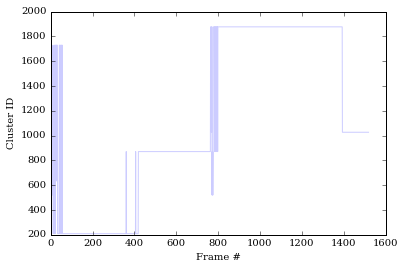

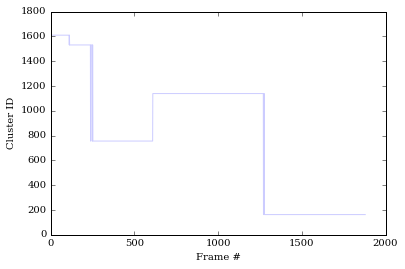

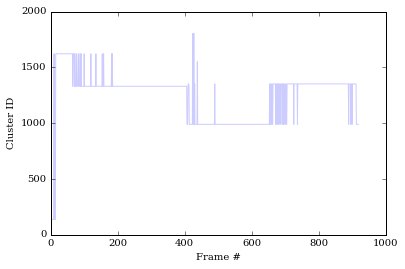

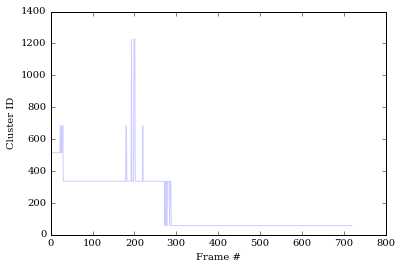

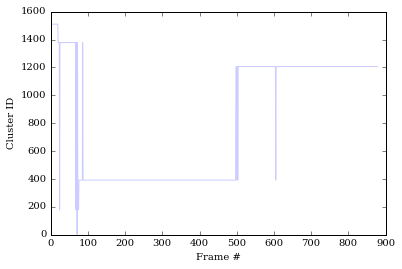

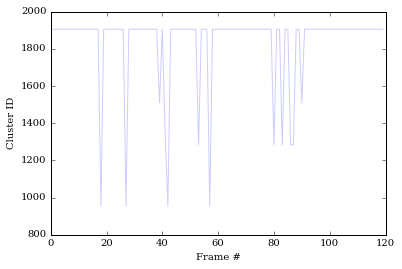

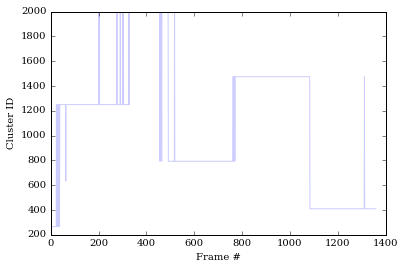

In [87]:
for traj in raw_dtrajs_abl[::100]:
    plt.figure()
    plt.plot(traj,alpha=0.2)
    plt.xlabel('Frame #')
    plt.ylabel('Cluster ID')

In [82]:
len(raw_dtrajs_abl),len(raw_dtrajs_src)

(679, 711)

In [119]:
mb_msm_src = msmbuilder.msm.MarkovStateModel(lag_time=lag_frames,
                                             #ergodic_cutoff=True,
                                             ergodic_cutoff=ergodic_cutoff)
mb_msm_src.fit(dtrajs_src)
print(mb_msm_src.summarize())

MSM contains 1861 strongly connected components above weight=2.00. Component 281 selected, with population 1.515782%
Markov state model
------------------
Lag time         : 10
Reversible type  : mle
Ergodic cutoff   : 2.0
Prior counts     : 0

Number of states : 9
Number of nonzero entries in counts matrix : 52 (64.1975308642%)
Nonzero counts matrix entries:
    Min.   : 0.1
    1st Qu.: 0.3
    Median : 1.2
    Mean   : 6.0
    3rd Qu.: 5.1
    Max.   : 46.0

Total transition counts :
    314.1 counts
Total transition counts / lag_time:
    31.41 units
Timescales:
    [207.67, 121.90, 52.86, 37.52, 25.96, 24.14, 18.67, 14.73]  units



In [58]:
def plot_relative_free_energies(stationary_distribution,model_name,top_k=50):
   ''' Use stationary distribution to compute the relative
   free energies of the top-k most stable states.

   Parameters
   ----------
   stationary_distribution : array-like
      vector of probabilities
   model_name : string
   top_k : int
   '''
   f_i = -np.log(sorted(stationary_distribution))[::-1];
   f_i -= f_i.min();
   plt.figure()
   plt.plot(f_i[:top_k], '.')
   plt.ylabel(r'Relative free energy ($k_B T \ln \pi_i$)')
   plt.xlabel('State index ($i$)')
   plt.title(model_name)

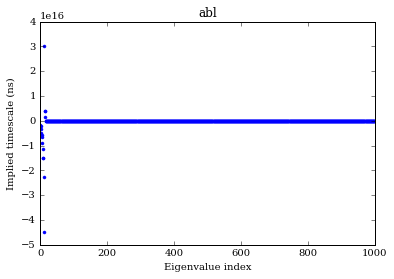

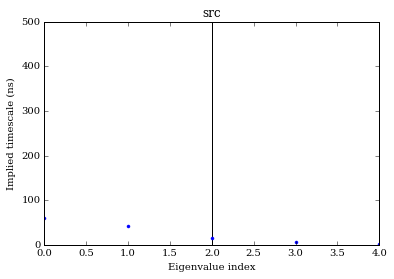

In [59]:
k=1000
convert_to_ns = lambda x:x/4.0

def plot_its(msm,k):
    plt.figure()
    plt.plot(convert_to_ns(msm.timescales_[:k]),'.')
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Implied timescale (ns)')


plot_its(mb_msm_abl,k) # cut at 8
plt.vlines(30,0,500)
plt.title('abl')

plot_its(mb_msm_src,k) # cut at 2?
plt.vlines(2,0,500)
plt.title('src')

In [60]:
# select number of macrostates by how many processes are slower than a threshold
ns_threshold=100

n_macro_abl=sum(convert_to_ns(mb_msm_abl.timescales_[:k])>ns_threshold)
n_macro_src=sum(convert_to_ns(mb_msm_src.timescales_[:k])>ns_threshold)
n_macro_abl,n_macro_src

(808, 0)

"The free energy of metastable state $S_j$ is just $f_j = - ln \sum_{i \in S_j} \pi_i$, where $\pi_i$ is the microstate equilibrium probability"

In [61]:
# compute coarse-graining by PCCA+
from msmbuilder import lumping

def coarse_grain_and_plot_energies(msm_obj,n_macro,title,kt_threshold=6):
    pcca = lumping.PCCAPlus.from_msm(msm_obj, n_macrostates=n_macro)
    n_micro=len(pcca.microstate_mapping_)

    # each element of this array is a list of microstate indices corresponding to macrostate indices
    microstates_per_macrostate = np.array([np.arange(n_micro)[pcca.microstate_mapping_==i] for i in range(n_macro)])

    # compute and sort relative macrostate free energies
    macrostate_free_energies = np.array([-np.log(np.sum([msm_obj.populations_[i] for i in microstates])) for microstates in microstates_per_macrostate])
    macrostate_free_energies -= macrostate_free_energies.min()
    macrostate_free_energies = np.array(sorted(macrostate_free_energies))

    # plot, with a threshold of 6kT
    plt.plot(macrostate_free_energies,'.')
    plt.xlabel('Macrostate index')
    plt.ylabel(r'Relative free energy ($k_B T \ln \pi_i$)')
    plt.title(title)
    plt.hlines(kt_threshold,0,n_macro,linestyles='--')

    print('# macrostates more metastable than {0}kB T: {1}'.format(kt_threshold,
                                                                   sum(macrostate_free_energies<kt_threshold)))
    return pcca,macrostate_free_energies


pcca_abl,macrostate_free_energies = coarse_grain_and_plot_energies(mb_msm_abl,n_macro_abl,'abl')
plt.figure()
pcca_src,_ = coarse_grain_and_plot_energies(mb_msm_src,10,'src')

KeyboardInterrupt: 

In [25]:
macrostate_free_energies = np.array([-np.log(np.sum([msm_obj.populations_[i] for i in microstates])) for microstates in microstates_per_macrostate])
macrostate_free_energies -= macrostate_free_energies.min()
macrostate_free_energies = np.array(sorted(macrostate_free_energies))

NameError: name 'microstates_per_macrostate' is not defined

In [26]:
pcca = pcca_abl
n_macro=31
n_micro=338
microstates_per_macrostate = np.array([np.arange(n_micro)[pcca.microstate_mapping_==i] for i in range(n_macro)])

# compute and sort relative macrostate free energies
macrostate_free_energies = np.array([-np.log(np.sum([mb_msm_abl.populations_[i] for i in microstates])) for microstates in microstates_per_macrostate])
macrostate_free_energies -= macrostate_free_energies.min()

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 338 but corresponding boolean dimension is 25
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


In [27]:
pcca_abl.microstate_mapping_

array([7, 2, 7, 7, 3, 4, 0, 1, 5, 2, 3, 1, 7, 3, 6, 0, 2, 7, 6, 2, 7, 4, 2,
       7, 3])

In [28]:
macrostate_free_energies

array([ 3.98964864,  3.73446889,  3.60892136,  3.16694943,  2.37784129,
        1.43659464,  0.82279479,  0.        ,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf])

In [29]:
macrostate_free_energies.max(),np.argmax(macrostate_free_energies)

(inf, 8)

In [30]:
most_metastable_macrostate = np.argmax(macrostate_free_energies)
microstate_indices_in_most_metastable_macrostate = microstates_per_macrostate[most_metastable_macrostate]

In [31]:
microstate_indices_in_most_metastable_macrostate

array([], dtype=int64)

In [32]:
mb_msm_abl.mapping_

{1: 0,
 67: 1,
 89: 2,
 128: 3,
 253: 4,
 278: 5,
 419: 6,
 428: 7,
 494: 8,
 717: 9,
 883: 10,
 894: 11,
 953: 12,
 1028: 13,
 1051: 14,
 1284: 15,
 1327: 16,
 1378: 17,
 1488: 18,
 1566: 19,
 1573: 20,
 1771: 21,
 1867: 22,
 1905: 23,
 1925: 24}

In [33]:
inv_map = {micro: cluster for cluster, micro in mb_msm_abl.mapping_.items()}

In [34]:
cluster_ids_in_metastable_state = [inv_map[i] for i in microstate_indices_in_most_metastable_macrostate]
cluster_ids_in_metastable_state

[]

In [35]:
# create a length-2000 array and save it, mapping each cluster_id to 
# its metastable state

macrostate_ids_abl = np.zeros(2000)-1

for i in range(len(macrostate_ids)):
    cluster_id = i
    if cluster_id in mb_msm_abl.mapping_:
        microstate_id = mb_msm_abl.mapping_[cluster_id]
        macrostate_id = pcca_abl.microstate_mapping_[microstate_id]
        macrostate_ids_abl[cluster_id] = macrostate_id
        
np.save('macrostate_ids_abl.npy',macrostate_ids_abl)

NameError: name 'macrostate_ids' is not defined

In [36]:
macrostate_ids_src = np.zeros(2000)-1

for i in range(len(macrostate_ids)):
    cluster_id = i
    if cluster_id in mb_msm_src.mapping_:
        microstate_id = mb_msm_src.mapping_[cluster_id]
        macrostate_id = pcca_src.microstate_mapping_[microstate_id]
        macrostate_ids_src[cluster_id] = macrostate_id
        
np.save('macrostate_ids_src.npy',macrostate_ids_src)

NameError: name 'macrostate_ids' is not defined

In [37]:
pcca_abl.populations_.shape

(25,)

In [38]:
pcca_abl.microstate_mapping_

array([7, 2, 7, 7, 3, 4, 0, 1, 5, 2, 3, 1, 7, 3, 6, 0, 2, 7, 6, 2, 7, 4, 2,
       7, 3])

In [39]:

for macrostate in range(pcca_abl.n_macrostates):
    pcca_abl.populations_

In [40]:
macrostate_ids

NameError: name 'macrostate_ids' is not defined

In [41]:
# map 

In [42]:
for i in cluster_ids_in_metastable_state:
    print(1.0*np.sum(np.hstack(dtrajs_abl)==i)/len(np.hstack(dtrajs_abl)))

In [43]:
# get microstate populations

populations_abl = np.zeros(2000)
for i in mb_msm_abl.mapping_:
    populations_abl[i] = mb_msm_abl.populations_[mb_msm_abl.mapping_[i]]

# select most populous microstate within each macrostate
n_macro = pcca_abl.n_macrostates
exemplar_inds_abl = np.zeros(n_macro,dtype=int)
for i in range(n_macro):
    exemplar_inds_abl[i] = np.argmax(populations_abl*(macrostate_ids_abl==i))
    
    
populations_src = np.zeros(2000)
for i in mb_msm_src.mapping_:
    populations_src[i] = mb_msm_src.populations_[mb_msm_src.mapping_[i]]

# select most populous microstate within each macrostate
n_macro = pcca_src.n_macrostates
exemplar_inds_src = np.zeros(n_macro,dtype=int)
for i in range(n_macro):
    exemplar_inds_src[i] = np.argmax(populations_src*(macrostate_ids_src==i))

In [44]:
exemplar_inds_src

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
np.save('exemplar_inds_abl.npy',exemplar_inds_abl)
np.save('exemplar_inds_src.npy',exemplar_inds_src)

In [46]:
def cg_T(microstate_T,microstate_pi, cg_map):
    ''' Coarse-grain a microstate transition matrix by applying cg_map
    Parameters
    ----------
    microstate_T : (N,N), array-like, square
       microstate transition matrix
    microstate_pi : (N,), array-like
       microstate stationary distribution
    cg_map : array-like
     assigns each microstate i to a macrostate cg_map[i]
    Returns
    -------
    T : numpy.ndarray, square
    '''

    n_macrostates = np.max(cg_map)+1
    n_microstates = len(microstate_T)

    # compute macrostate stationary distribution
    macrostate_pi = np.zeros(n_macrostates)
    for i in range(n_microstates):
        macrostate_pi[cg_map[i]] += microstate_pi[i]
    macrostate_pi /= np.sum(macrostate_pi)
    
    # accumulate macrostate transition matrix
    T = np.zeros((n_macrostates,n_macrostates))
    for i in range(n_microstates):
        for j in range(n_microstates):
            T[cg_map[i],cg_map[j]] += microstate_pi[i] * microstate_T[i,j]
    
    # normalize
    for a in range(n_macrostates):
        T[a] /= macrostate_pi[a]
     
    return T

In [47]:
T = cg_T(mb_msm_abl.transmat_,mb_msm_abl.populations_,pcca_abl.microstate_mapping_)

In [48]:
pcca_metastability = np.trace(T)
pcca_metastability

7.60737533514685

In [49]:
np.trace(T)/len(T),len(T)

(0.95092191689335626, 8)

In [50]:
np.diag(T)

array([ 0.90102843,  0.9652539 ,  0.96484702,  0.95593442,  0.94146428,
        0.96805112,  0.94158493,  0.96921124])

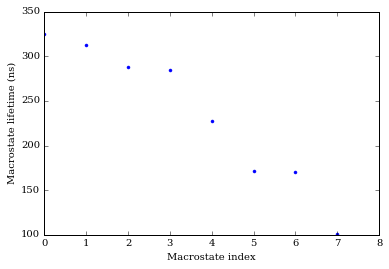

In [51]:
lifetimes = 10/(1-np.diag(T))
plt.plot(np.array(sorted(lifetimes)[::-1]),'.')
plt.xlabel('Macrostate index')
plt.ylabel("Macrostate lifetime (ns)")
plt.hlines(100,0,len(T))

ValueError: x and y must be the same size

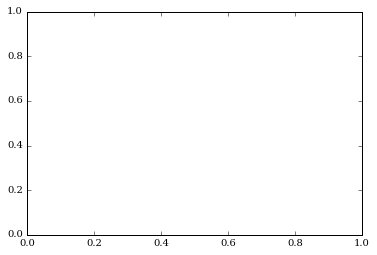

In [52]:
plt.scatter(lifetimes,macrostate_free_energies)
plt.xlabel('lifetimes')
plt.ylabel('free energies (relative, in kT)')

In [ ]:
import sys
sys.path.append("../../automatic-state-decomposition/decompose-py/")

import lumping
reload(lumping)



In [ ]:
cgs = []

for i in range(5):
    print(i)
    cg = lumping.CoarseGrain(n_macro_abl,max_iter=100000)
    cg.fit(mb_msm_abl.transmat_,mb_msm_abl.populations_,
                       init_cg_map=pcca_abl.microstate_mapping_
                      )
    cgs.append(cg)

In [ ]:
for cg in cgs:
    plt.plot(cg.optimization_trace,alpha=0.5)
plt.xlabel('Optimization iteration')
plt.ylabel('Metastability')
plt.title('MCSA, randomly initialized')
plt.ylim(0,1)
plt.hlines(pcca_metastability,0,len(cgs[0].optimization_trace),linestyles='--')
plt.xlim(0,len(cgs[0].optimization_trace))

In [ ]:
pcca_abl.n_macrostates

In [ ]:
cg = cgs[0]
cg.solns[-1],pcca_abl.microstate_mapping_

In [ ]:
mcsa_microstate_mapping_ = cgs[3].solns[-1][0]

In [ ]:
# PCCA object instructs me to transform dtrajs into coarse-grained dtrajs and fit a new markov state model
# to get coarse-grained transition matrix...
def pcca_T(pcca_obj,dtrajs):
    macrostate_dtrajs = []
    for dtraj in dtrajs:
        m_dtraj = np.zeros(len(dtraj),dtype=int)
        for i in range(len(m_dtraj)):
            m_dtraj[i] = pcca_obj.microstate_mapping_[pcca_obj.mapping_[dtraj[i]]]
        macrostate_dtrajs.append(m_dtraj)
    M = msmbuilder.msm.MarkovStateModel()
    M.fit(macrostate_dtrajs)
    T = M.transmat_
    return T

In [ ]:
# but this yields errors, since some cluster IDs are not included due to ergodic trimming
T = pcca_T(pcca_abl,dtrajs_abl)

In [ ]:
# re-do with MCSA outputs

# create a length-2000 array and save it, mapping each cluster_id to 
# its metastable state

def get_macrostate_ids(mapping):
    macrostate_ids_abl = np.zeros(2000)-1

    for i in range(len(macrostate_ids)):
        cluster_id = i
        if cluster_id in mb_msm_abl.mapping_:
            microstate_id = mb_msm_abl.mapping_[cluster_id]
            macrostate_id = mapping[microstate_id]
            macrostate_ids_abl[cluster_id] = macrostate_id
    return macrostate_ids_abl
        
mcsa_macrostate_ids_abl = get_macrostate_ids(mcsa_microstate_mapping_)
np.save('mcsa_macrostate_ids_abl.npy',mcsa_macrostate_ids_abl)


# select most populous microstate within each macrostate
n_macro = pcca_abl.n_macrostates
exemplar_inds_abl = np.zeros(n_macro,dtype=int)
for i in range(n_macro):
    exemplar_inds_abl[i] = np.argmax(populations_abl*(mcsa_macrostate_ids_abl==i))
np.save('mcsa_exemplar_inds_abl.npy',exemplar_inds_abl)

In [ ]:
populations_abl.shape

In [ ]:
exemplar_inds_abl

In [ ]:
# compute and sort relative macrostate free energies
msm_obj = mb_msm_abl

# each element of this array is a list of microstate indices corresponding to macrostate indices
microstates_per_macrostate = np.array([np.arange(n_micro)[mcsa_microstate_mapping_==i] for i in range(n_macro)])
macrostate_free_energies = np.array([-np.log(np.sum([msm_obj.populations_[i] for i in microstates])) for microstates in microstates_per_macrostate])
macrostate_free_energies -= macrostate_free_energies.min()

In [ ]:
macrostate_free_energies

In [ ]:
sorted_inds = np.array(sorted(np.arange(len(exemplar_inds_abl)),key=lambda i:macrostate_free_energies[i]))

In [ ]:
macrostate_free_energies[sorted_inds]

In [ ]:
exemplar_inds_abl[sorted_inds]

In [ ]:
zip([float('{0:.2f}'.format(x)) for x in macrostate_free_energies[sorted_inds]],exemplar_inds_abl[sorted_inds])

In [ ]:
free_energy_by_macrostate = []
for i in range(len(exemplar_inds)):
    
    free_energy_by_macrostate.append()